In [1]:
import sys
import tensorflow as tf
sys.path.append("/visuworks/Blindless_AIFFELTON/Models")

# import customized modules
import preprocess, data_generator, check_result, metrics, loss, train

sys.path.append("/visuworks/Blindless_AIFFELTON/Models/SD_Unet")
import sd_unet

# Insert Path
# {model_name}_{epoch}ep_{model_inpusize}_{Generator | aG/fG/sG}
FILE_NAME = 'sd_unet_30ep_1024_aG'
INPUT_SHAPE = (1024, 1024, 1)
MODEL_PATH = "/visuworks/Blindless_AIFFELTON/Models/SD_Unet/model_parameters/" + FILE_NAME + ".h5"
HISTORY_PATH = "/visuworks/Blindless_AIFFELTON/Models/SD_Unet/history/" + FILE_NAME + '_history' ".json"
SOURCE = '/visuworks/Dataset/Selected Dataset 2'

2024-01-26 11:24:44.155702: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-26 11:24:44.208319: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-26 11:24:44.208353: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-26 11:24:44.209773: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-26 11:24:44.217726: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Define custom objects for loading the model
custom_objects = {'DiceLoss': loss.DiceLoss(), 
                  'sensitivity': metrics.sensitivity,
                  'specificity': metrics.specificity,
                  'accuracy' : metrics.accuracy,
                  'DropBlock2D': sd_unet.DropBlock2D}

# Create augmentation
train_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0])
test_preproc = preprocess.build_augmentation_for_general(INPUT_SHAPE[0], INPUT_SHAPE[0],is_train=False)

# Create train, test generator
train_generator = data_generator.FullSizedDataGenerator(
    SOURCE, 
    batch_size=4, 
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=True,
    augmentation= train_preproc
)

test_generator = data_generator.FullSizedDataGenerator(
    SOURCE, 
    batch_size=4, 
    img_size=INPUT_SHAPE,
    output_size=INPUT_SHAPE,
    is_train=False,
    augmentation= test_preproc
)

# Create model
model = sd_unet.SD_UNet(INPUT_SHAPE)
model.summary()

2024-01-26 11:24:48.933890: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 20763 MB memory:  -> device: 0, name: NVIDIA L4, pci bus id: 0000:00:03.0, compute capability: 8.9


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1024, 1024, 1)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 1024, 1024, 8)        80        ['input_1[0][0]']             
                                                                                                  
 drop_block2d (DropBlock2D)  (None, 1024, 1024, 8)        2097152   ['conv2d[0][0]']              
                                                                                                  
 activation (Activation)     (None, 1024, 1024, 8)        0         ['drop_block2d[0][0]']        
                                                                                              

In [3]:
train.model_train(model,
                  epoch = 30,
                  train_generator = train_generator,
                  test_generator = test_generator,
                  model_path = MODEL_PATH,
                  history_path = HISTORY_PATH)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: UserWarning: `tf.keras.backend.random_binomial` is deprecated, and will be removed in a future version.Please use `tf.keras.backend.random_bernoulli` instead.
  return dispatch_target(*args, **kwargs)
2024-01-26 11:24:59.030743: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-01-26 11:25:04.363860: I external/local_xla/xla/service/service.cc:168] XLA service 0x7faf4dc6edd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-26 11:25:04.363893: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA L4, Compute Capability 8.9
2024-01-26 11:25:04.370807: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1706268304.491350   12462 device_compiler.h:186] Compiled cluster using 

295/295 [==============================] - ETA: 0s - loss: 0.7020 - sensitivity: 0.0357 - specificity: 0.9721 - accuracy: 0.9073
Epoch 1: val_sensitivity improved from -inf to 0.01170, saving model to /visuworks/Blindless_AIFFELTON/Models/SD_Unet/model_parameters/sd_unet_30ep_1024_aG.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


295/295 [==============================] - 286s 877ms/step - loss: 0.7020 - sensitivity: 0.0357 - specificity: 0.9721 - accuracy: 0.9073 - val_loss: 0.6779 - val_sensitivity: 0.0117 - val_specificity: 0.9999 - val_accuracy: 0.9307
Epoch 2/30
295/295 [==============================] - ETA: 0s - loss: 0.5143 - sensitivity: 0.4353 - specificity: 0.9612 - accuracy: 0.9248
Epoch 2: val_sensitivity improved from 0.01170 to 0.36151, saving model to /visuworks/Blindless_AIFFELTON/Models/SD_Unet/model_parameters/sd_unet_30ep_1024_aG.h5
295/295 [==============================] - 254s 860ms/step - loss: 0.5143 - sensitivity: 0.4353 - specificity: 0.9612 - accuracy: 0.9248 - val_loss: 0.4846 - val_sensitivity: 0.3615 - val_specificity: 0.9900 - val_accuracy: 0.9461
Epoch 3/30
295/295 [==============================] - ETA: 0s - loss: 0.4218 - sensitivity: 0.5374 - specificity: 0.9659 - accuracy: 0.9365
Epoch 3: val_sensitivity improved from 0.36151 to 0.43097, saving model to /visuworks/Blindless_

125/125 [==============================] - 73s 579ms/step - loss: 0.2332 - sensitivity: 0.8326 - specificity: 0.9670 - accuracy: 0.9578
Loss: 0.2331608235836029
Sensitivity: 0.8326256275177002
Specificity: 0.9670157432556152
Accuracy: 0.9578248262405396


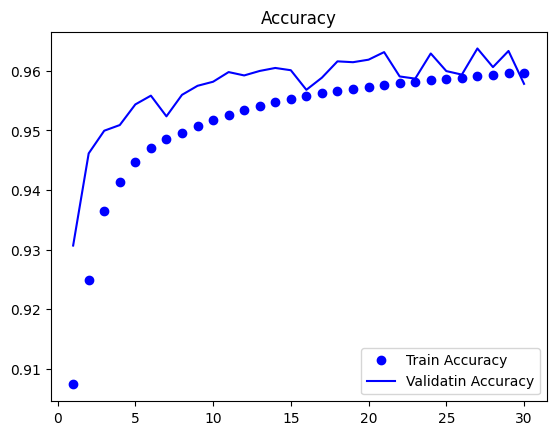

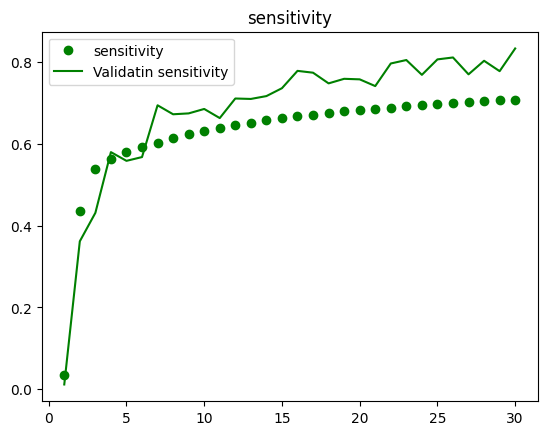

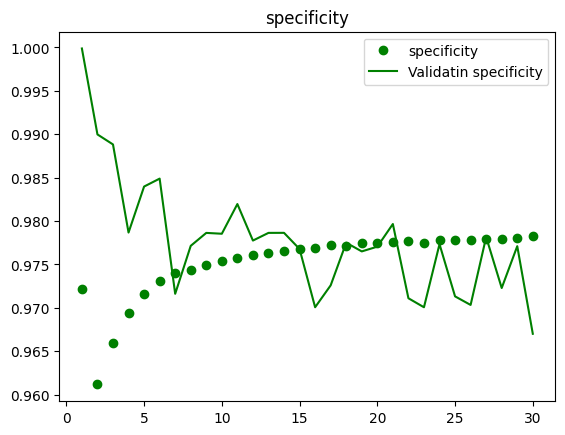

<Figure size 640x480 with 0 Axes>

In [4]:
# Load the model with custom_objects parameter
model = tf.keras.models.load_model(MODEL_PATH, custom_objects=custom_objects)

# Plot history and pring evaluation of test dataset
metrics.print_evaluation(model, test_generator)
check_result.plot_history(HISTORY_PATH)

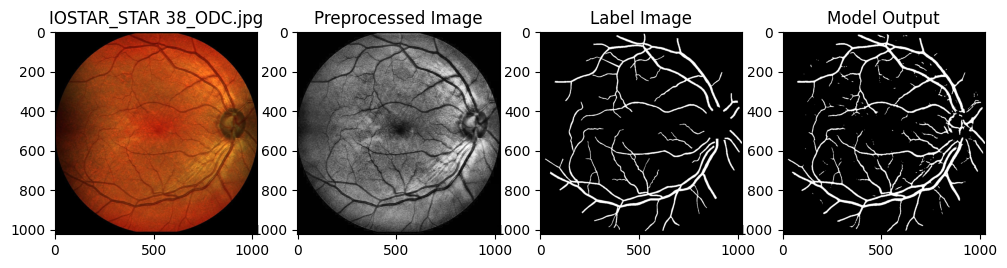

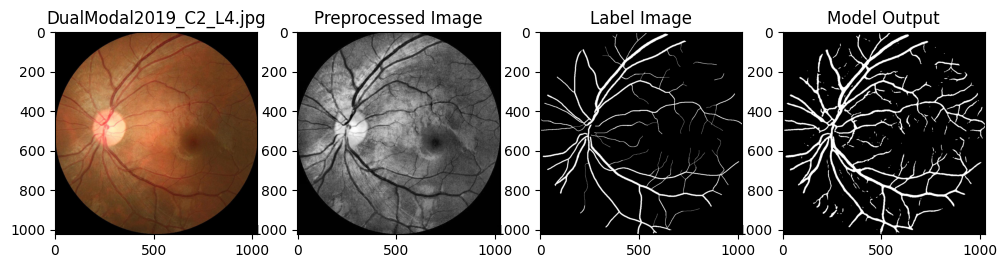

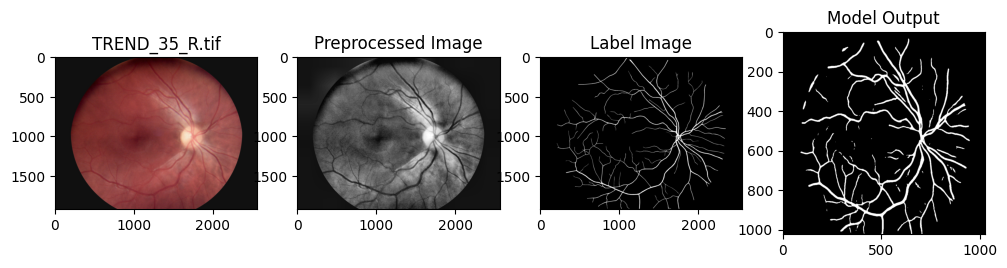

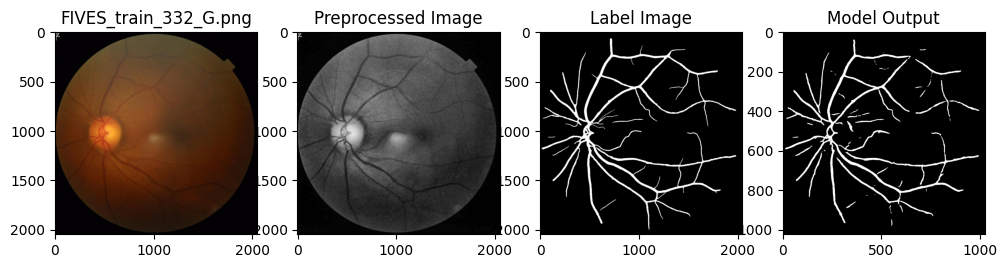

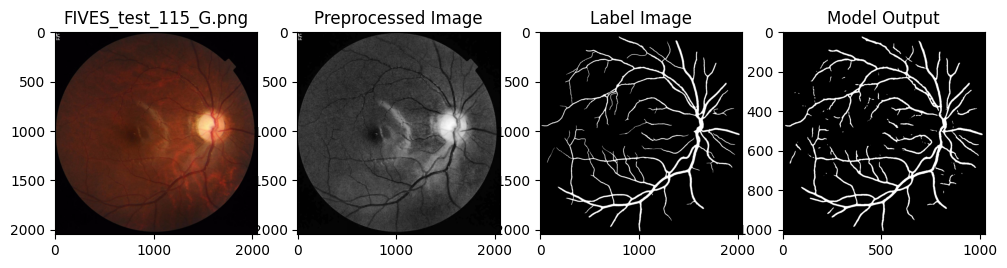

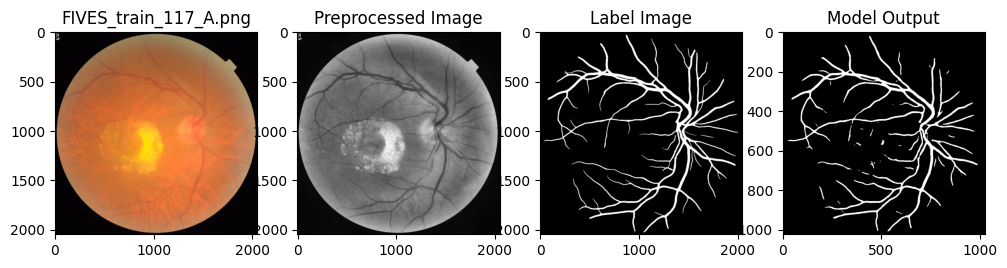

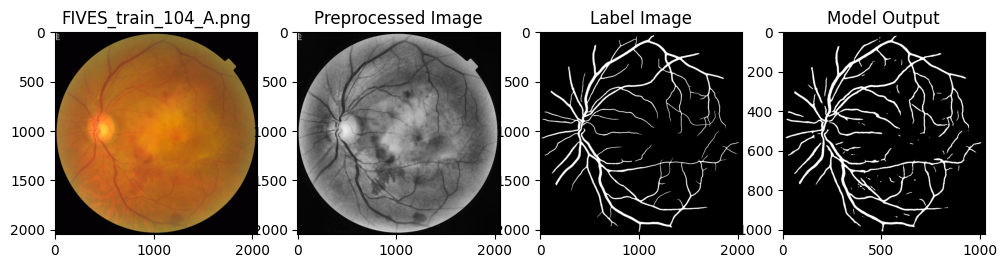

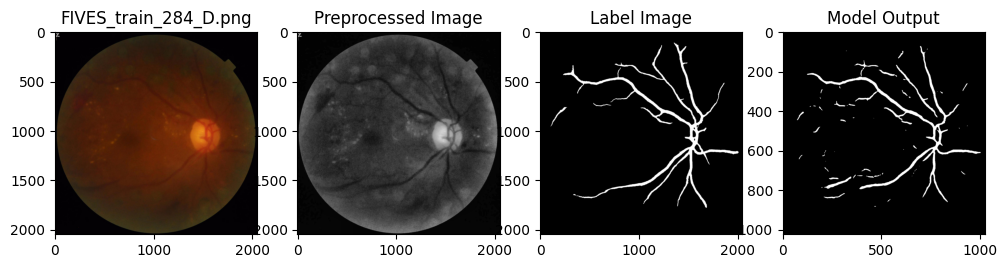

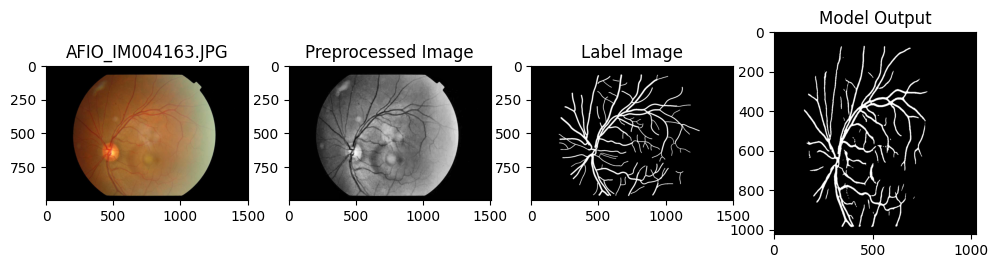

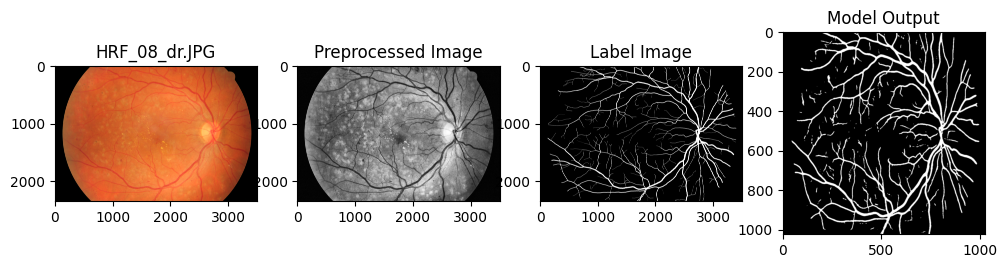

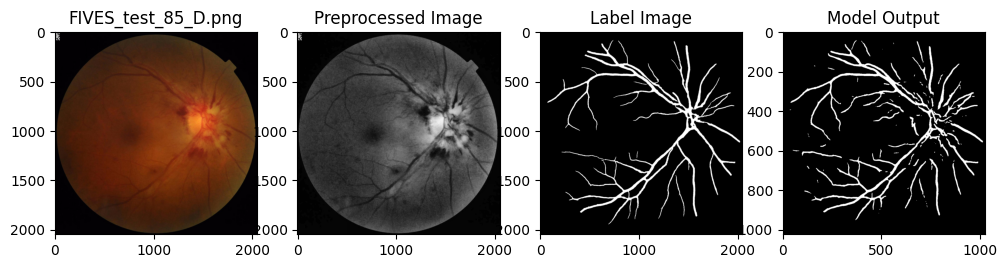

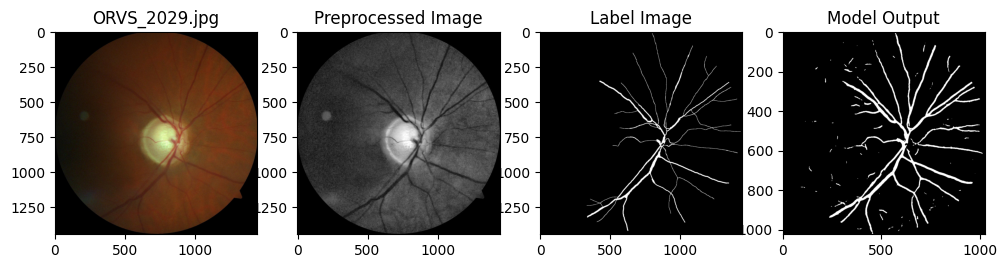

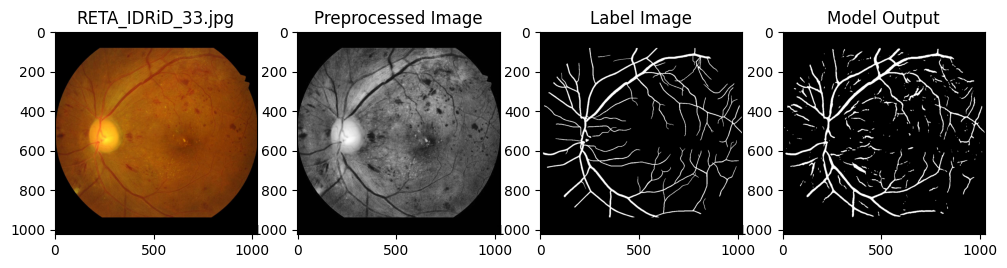

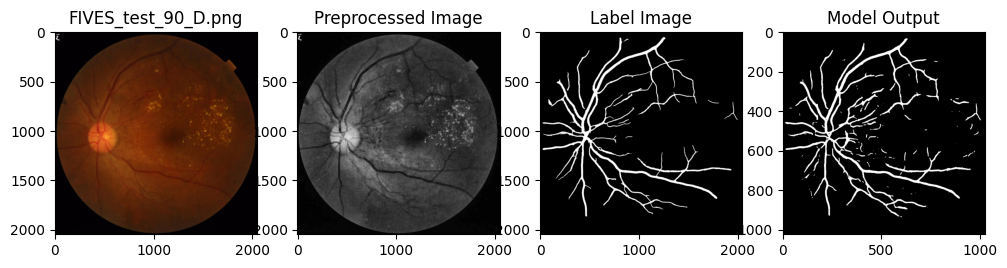

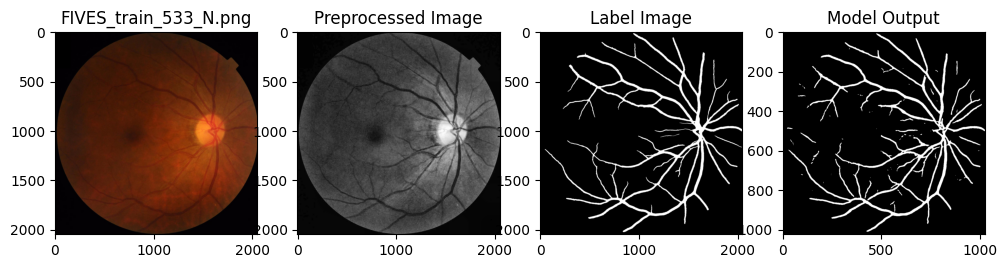

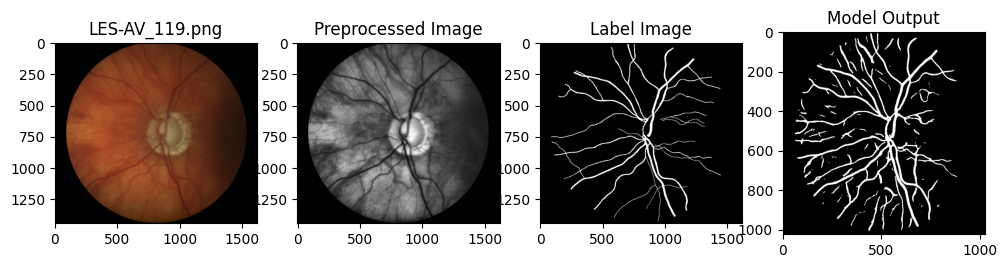

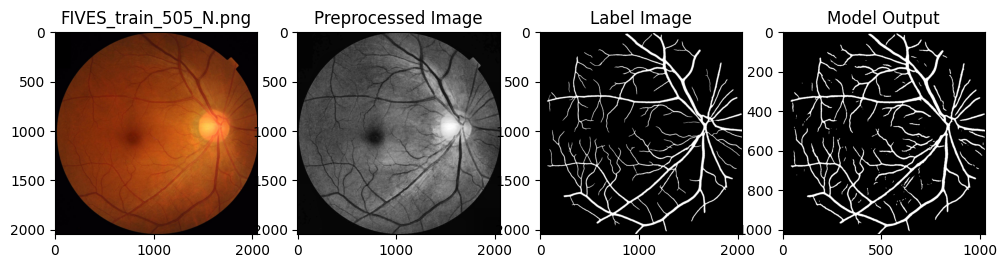

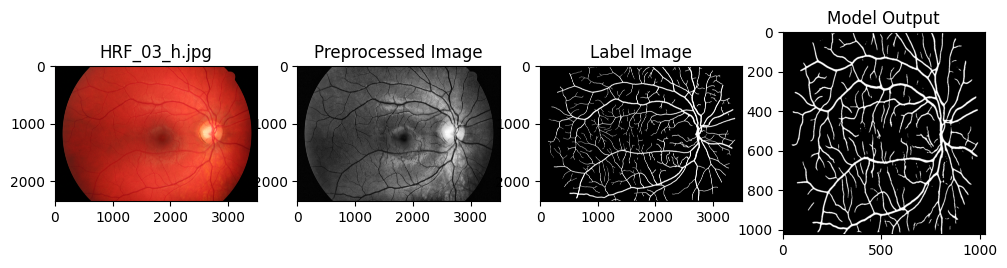

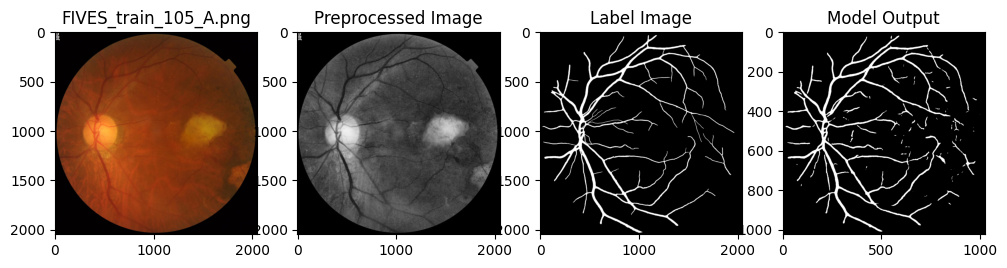

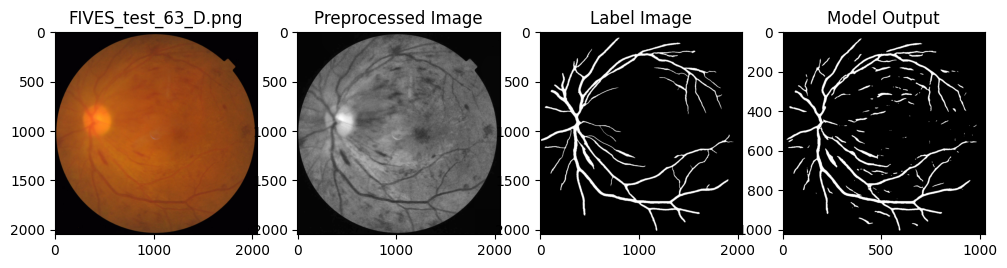

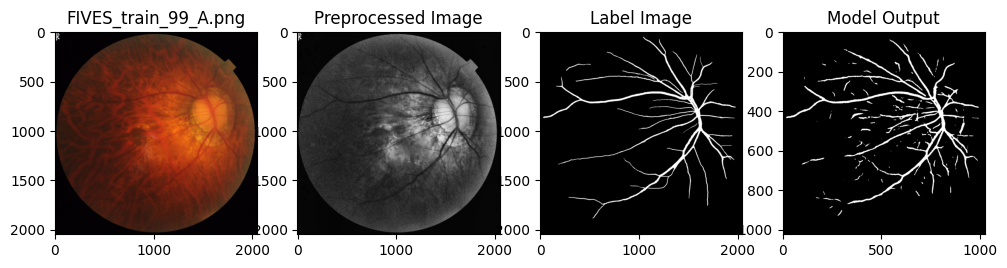

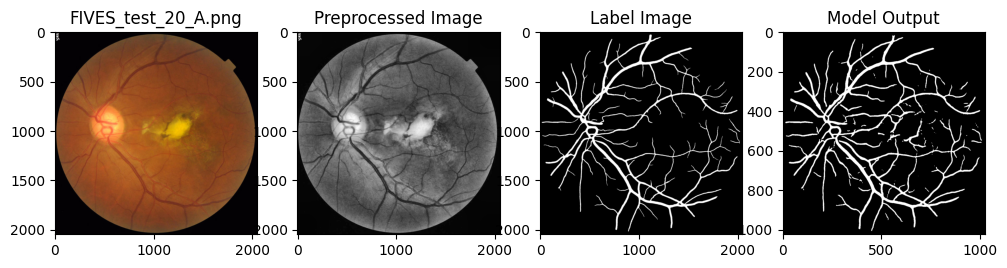

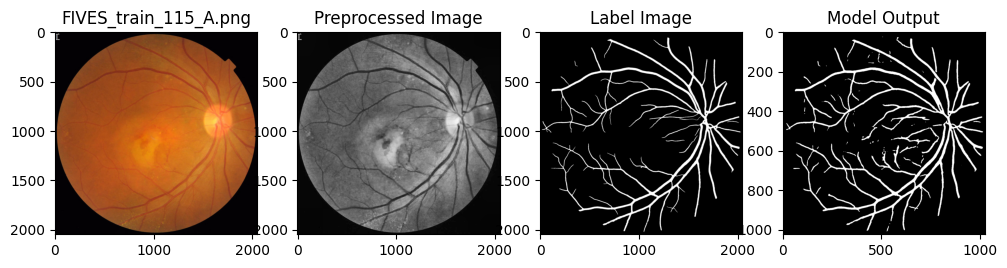

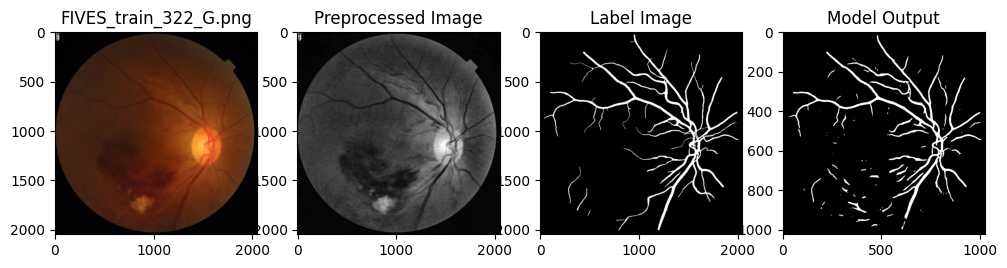

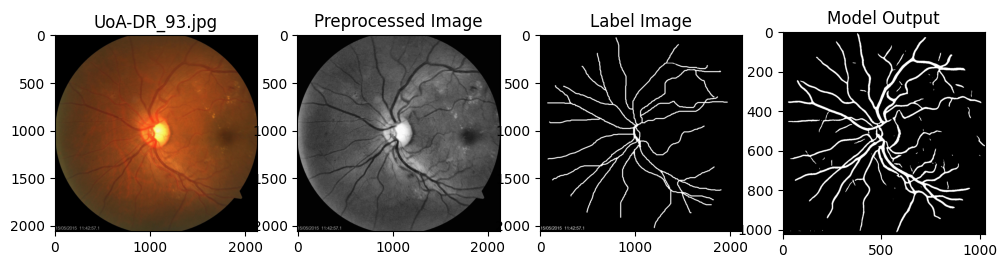

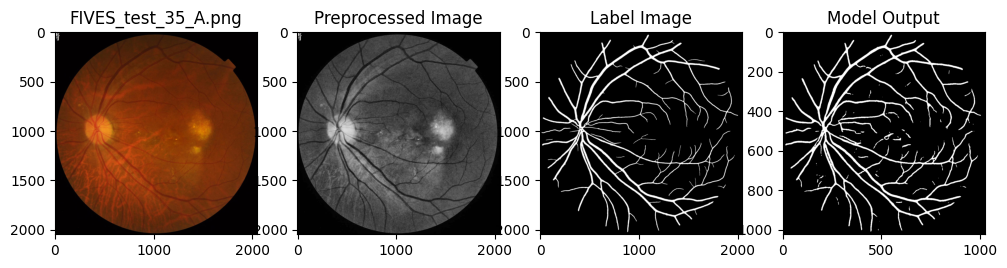

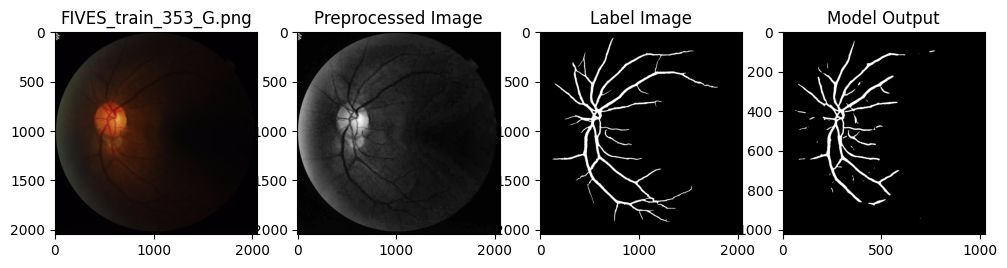

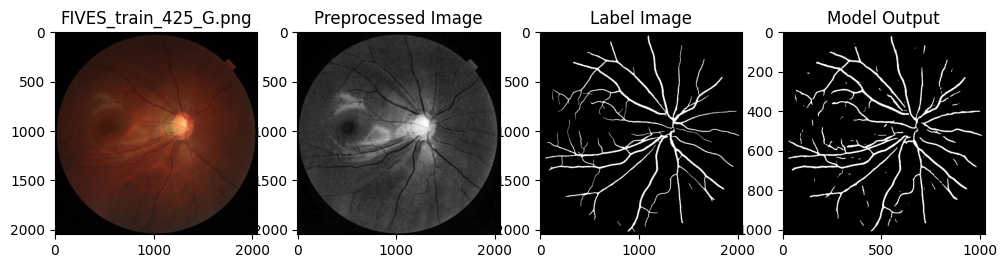

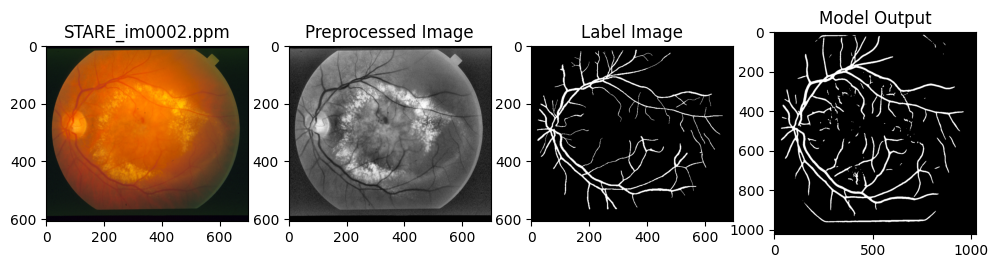

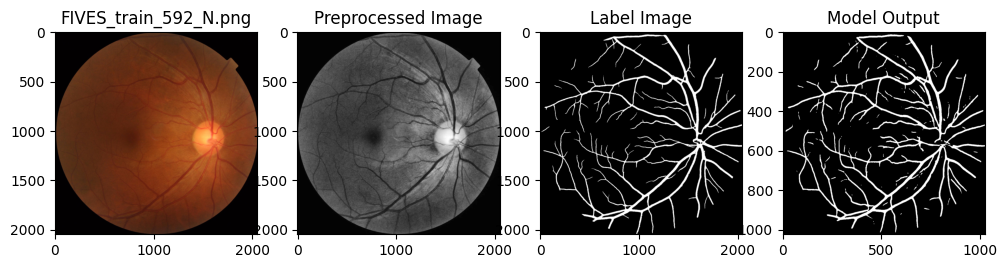

In [5]:
# Plot model result
num_images_to_select = 30
check_result.visualize_FG_result(model, num_images_to_select, SOURCE, INPUT_SHAPE, test_preproc)